# Energy efficiency prediction

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ML_Green_Building

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ML_Green_Building


## Load data

In [26]:
import pandas as pd

seed = 42
test_size = 0.2

In [27]:
listings_df = pd.read_csv('data/Listings_FE.csv')
print(listings_df.columns)
display(listings_df)
print(listings_df['Listing Description'])

Index(['Advertisement Id', 'Advertisement Version Id',
       'Day of Advertisement Created', 'Day of Date Available From',
       'Geo Canton', 'Geo City', 'Geo Zip', 'PropertyID', 'Are Pets Allowed',
       'Category Idx', 'Floor', 'Form Lead Unique', 'Has Balcony',
       'Has Cabletv', 'Has Elevator', 'Has Fireplace', 'Has Garage',
       'Has Parking', 'Is New Construction', 'Is New Construction Potential',
       'Is Tenant2Tenant', 'Is Wheelchairaccessible', 'Jahr',
       'Leerwohnungsziffer', 'Listing Description', 'Listing Title',
       'Livingspace', 'Number Of Rooms', 'Number Of Rooms Cleaned',
       'Number of Documents', 'Number of Images', 'Price Extra Normalized',
       'Price Gross Normalized', 'Price M2 Normalized', 'Price Net Normalized',
       'Rent_hypothetical', 'Size M2 Normalized', 'Subcategory En Idx',
       'Year Built', 'Year Lastrenovated', 'Akonto_M2_Normalized',
       'PropertyFE', 'Property Reference Id'],
      dtype='object')


,Advertisement Id,Advertisement Version Id,Day of Advertisement Created,Day of Date Available From,Geo Canton,Geo City,Geo Zip,PropertyID,Are Pets Allowed,Category Idx,...,Price M2 Normalized,Price Net Normalized,Rent_hypothetical,Size M2 Normalized,Subcategory En Idx,Year Built,Year Lastrenovated,Akonto_M2_Normalized,PropertyFE,Property Reference Id
0,105369788,11,2015-10-27 01:00:00,"September 1, 2014",NE,Neuchâtel,2000,9393,0.0,APPT,...,16.0,1100.0,NaN,81.0,Apartment,NaN,NaN,2.901235,118.808888,9393.61.5829
1,105369788,12,2015-10-27 01:00:00,"September 1, 2014",NE,Neuchâtel,2000,9393,0.0,APPT,...,15.0,1100.0,NaN,81.0,Apartment,NaN,NaN,1.851852,118.808888,9393.61.5829
2,105380808,15,2015-11-02 01:00:00,NaN,TI,Savosa,6942,2401,0.0,APPT,...,21.0,1530.0,NaN,87.0,Apartment,NaN,NaN,2.988506,86.933300,2401.26.1351
3,105380808,16,2015-11-02 01:00:00,NaN,TI,Savosa,6942,2401,0.0,APPT,...,21.0,1530.0,NaN,87.0,Apartment,NaN,NaN,2.988506,86.933300,2401.26.1351
4,105380808,18,2015-11-02 01:00:00,NaN,TI,Savosa,6942,2401,0.0,APPT,...,21.0,1530.0,NaN,87.0,Apartment,NaN,NaN,2.988506,86.933300,2401.26.1351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94221,3001857722,1,2022-05-10 02:00:00,"August 1, 2022",AG,Kölliken,5742,5608,1.0,APPT,...,17.0,1350.0,NaN,94.0,Apartment,1995.0,NaN,2.765957,78.672787,5608.61.9754
94222,3001857723,1,2022-05-10 02:00:00,"June 1, 2022",VD,Montreux,1820,7461,NaN,APPT,...,20.0,1850.0,NaN,115.0,Apartment,1991.0,2008.0,3.478261,116.051448,7461.83.9894
94223,3001857724,1,2022-05-10 02:00:00,"May 1, 2022",ZH,Zürich,8048,9198,1.0,APPT,...,37.0,1420.0,NaN,40.0,Apartment,1977.0,2014.0,1.600000,92.338857,9198.61.5606
94224,3001857725,2,2022-05-10 02:00:00,"August 1, 2022",ZH,Zürich,8047,2970,NaN,APPT,...,35.0,2885.0,NaN,91.0,Apartment,1948.0,1997.0,2.912088,39.669587,2970.61.7877


0        Au coeur d'un quartier calme et verdoyant, ce ...
1        Au coeur d'un quartier calme et verdoyant, ce ...
2        Affittiamo appartamento di 4.5 locali in zona ...
3        Affittiamo appartamento di 4.5 locali in zona ...
4        Affittiamo bellissimo appartamento di 4.5 loca...
                               ...                        
94221    Per 01.08.2022 oder nach Vereinbarung vermiete...
94222    Appartement dans un immeuble des années 90, id...
94223    Wir vermieten eine helle 1.5-Zimmerwohnung an ...
94224    Die 3-Zimmer-Maisonettewohnung mit Loft-Charak...
94225    Wir vermieten an der Viaduktstrasse 6 in Heris...
Name: Listing Description, Length: 94226, dtype: object


In [28]:
# load npy file
import numpy as np

properties_train = np.load('data/train_data_properties.npy', allow_pickle=True)
properties_test = np.load('data/test_data_properties.npy', allow_pickle=True)

# select the properties that are in the train and test sets
text_train = listings_df[listings_df['Property Reference Id'].isin(properties_train)]
text_test = listings_df[listings_df['Property Reference Id'].isin(properties_test)]

# delete the rows where the text is empty
text_train = text_train.dropna(subset=['Listing Description'])


In [29]:
print(text_train)

       Advertisement Id  Advertisement Version Id  \
8             105437951                         8   
94            105700823                        10   
95            105700823                        11   
96            105700823                        13   
97            105700823                        15   
...                 ...                       ...   
94013        3001845888                         1   
94053        3001848706                         1   
94150        3001851732                         1   
94185        3001855082                         1   
94199        3001855778                         1   

      Day of Advertisement Created Day of Date Available From Geo Canton  \
8              2015-12-11 01:00:00                        NaN         AG   
94             2016-04-26 02:00:00               July 1, 2016         BL   
95             2016-04-26 02:00:00               July 1, 2016         BL   
96             2016-04-26 02:00:00               July 1, 20

In [32]:
from regression_FE import *
from transformers import BertTokenizer, BertModel

# Parameters
MAX_LEN = 500
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
EPOCHS = 10
LEARNING_RATE = 2e-4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# load tokenizer and pretrained model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BERTRegressor('bert-base-multilingual-cased').to(device)

# Create the dataset
train_dataset = ListingsDataset(text_train, tokenizer, MAX_LEN)
train_loader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)

test_dataset = ListingsDataset(text_test, tokenizer, MAX_LEN)
test_loader = DataLoader(test_dataset, batch_size=VALID_BATCH_SIZE, shuffle=False)

# Optimizer
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

# Loss function
criterion = nn.MSELoss()

In [33]:
# Train and save the model
train(model, train_loader, test_loader, criterion, optimizer, device, EPOCHS, save_path="model/text_model.pth")


Training: 100%|██████████| 721/721 [03:20<00:00,  3.60it/s]


Epoch 1/10
Train loss: 2190.4327576064534
Test loss: 1142.6231317018207
Model saved at epoch 1 with test loss 1142.6231317018207


Training: 100%|██████████| 721/721 [03:20<00:00,  3.60it/s]


Epoch 2/10
Train loss: 1039.534302583184
Test loss: 957.4977653403031
Model saved at epoch 2 with test loss 957.4977653403031


Training: 100%|██████████| 721/721 [03:19<00:00,  3.61it/s]


Epoch 3/10
Train loss: 778.7072481427874
Test loss: 968.6499636466043


Training: 100%|██████████| 721/721 [03:19<00:00,  3.62it/s]


Epoch 4/10
Train loss: 730.3933498684146
Test loss: 982.4813834742496


Training: 100%|██████████| 721/721 [03:20<00:00,  3.60it/s]


Epoch 5/10
Train loss: 720.0935916979997
Test loss: 1091.202954530716


Training: 100%|██████████| 721/721 [03:19<00:00,  3.61it/s]


Epoch 6/10
Train loss: 709.0252959929954
Test loss: 989.0476707993893


Training: 100%|██████████| 721/721 [03:19<00:00,  3.61it/s]


Epoch 7/10
Train loss: 699.5078520543367
Test loss: 999.7646990198838


Training: 100%|██████████| 721/721 [03:19<00:00,  3.61it/s]


Epoch 8/10
Train loss: 690.5231843543614
Test loss: 989.9790668320237


Training: 100%|██████████| 721/721 [03:19<00:00,  3.61it/s]


Epoch 9/10
Train loss: 695.0249967747026
Test loss: 964.7154241361117


Training: 100%|██████████| 721/721 [03:19<00:00,  3.61it/s]


Epoch 10/10
Train loss: 681.787329029607
Test loss: 1000.3734062763683


In [40]:
import torch
saved_model = BERTRegressor('bert-base-multilingual-cased')
saved_model.load_state_dict(torch.load('model/text_model.pth'))
saved_model.to(device)

BERTRegressor(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [41]:
eval_model(saved_model, test_loader, criterion, device)

957.4977653403031

In [46]:
# save the predictions
property_ids = listings_df[listings_df['Property Reference Id'].isin(properties_test)]['Advertisement Id'].tolist()
predictions = []
labels = []

print(len(property_ids))
saved_model.eval()
with torch.no_grad():
    for d in test_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = saved_model(input_ids=input_ids, attention_mask=attention_mask)
        predictions.extend(outputs.cpu().numpy().flatten().tolist())
        labels.extend(d["targets"].cpu().numpy().flatten().tolist())


predictions_df = pd.DataFrame({
    'Property Reference Id': property_ids,
    'Predicted FE': predictions,
    'Actual FE': labels
})

print(predictions_df)

predictions_df.to_csv("text_predictions.csv")


909
     Property Reference Id  Predicted FE   Actual FE
0                105789429    106.179428  107.473694
1                105789429    101.898064  107.473694
2                105789429    101.898064  107.473694
3                105979247     76.716469  119.438560
4                105987835     71.205650   80.456039
..                     ...           ...         ...
904             3001845895    100.100731  126.598526
905             3001845895    100.100731  126.598526
906             3001848731     80.988655  126.598526
907             3001851085     90.040146  119.118103
908             3001855775     96.092224   92.160507

[909 rows x 3 columns]


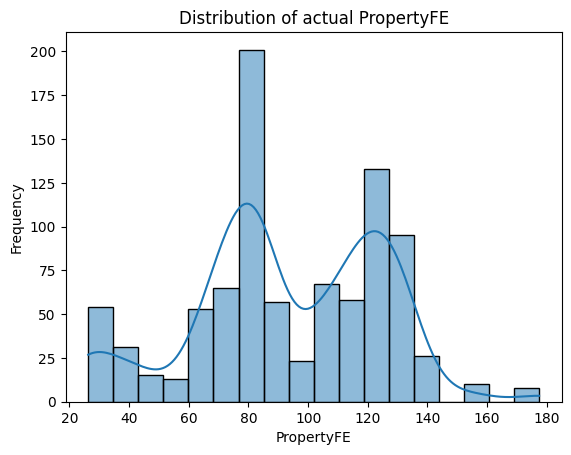

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(predictions_df['Actual FE'].tolist(), kde=True)
plt.title('Distribution of actual PropertyFE')
plt.xlabel('PropertyFE')
plt.ylabel('Frequency')
plt.show()

In [45]:
import numpy as np

mean_actual = predictions_df['Actual FE'].mean()

mean_predictions = np.full_like(predictions_df['Actual FE'], mean_actual)

mse = np.mean((predictions_df['Actual FE'] - mean_predictions) ** 2)

print("Baseline Mean Squared Error (MSE) when only predicting the mean:", mse)

Baseline Mean Squared Error (MSE) when only predicting the mean: 997.767153582601
